### EXPLORATION OF OMNI2 DATA SET

## 1. Data Exploration

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
import math

### a) Data set structure

In [156]:
# Read the data set
df = pd.read_csv('../data/raw/Omni_98_20.csv', parse_dates=True)

# Set the time to UTC format
df['time'] = pd.to_datetime(df['time'], errors='coerce', utc=True)

# Output the data set
df

,time,Bx,By,Bz,density,V,Dst
0,1988-01-01 00:00:00+00:00,999.9,999.9,999.9,999.9,9999,-16
1,1988-01-01 01:00:00+00:00,999.9,999.9,999.9,999.9,9999,-10
2,1988-01-01 02:00:00+00:00,999.9,999.9,999.9,999.9,9999,-8
3,1988-01-01 03:00:00+00:00,4.1,-1.9,-0.5,14.6,282,-6
4,1988-01-01 04:00:00+00:00,5.3,-2.0,0.3,12.5,283,-6
...,...,...,...,...,...,...,...
289291,2020-12-31 19:00:00+00:00,-0.7,-1.7,0.9,4.0,385,3
289292,2020-12-31 20:00:00+00:00,-0.6,-2.0,0.7,4.4,378,6
289293,2020-12-31 21:00:00+00:00,-0.1,-2.0,-0.2,4.4,373,4
289294,2020-12-31 22:00:00+00:00,2.3,-0.8,-0.4,4.4,363,3


In [157]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289296 entries, 0 to 289295
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype              
---  ------   --------------   -----              
 0   time     289296 non-null  datetime64[ns, UTC]
 1   Bx       289296 non-null  float64            
 2   By       289296 non-null  float64            
 3   Bz       289296 non-null  float64            
 4   density  289296 non-null  float64            
 5   V        289296 non-null  int64              
 6   Dst      289296 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(2)
memory usage: 15.5 MB


,Bx,By,Bz,density,V,Dst
count,289296.000000,289296.000000,289296.000000,289296.000000,289296.000000,289296.000000
mean,125.451494,125.539402,125.507402,150.690582,1665.224635,-14.351678
std,331.221853,331.327176,331.331903,350.023119,3210.111810,22.262813
min,-40.800000,-43.100000,-57.800000,0.100000,228.000000,-589.000000
25%,-2.200000,-2.100000,-1.300000,3.500000,361.000000,-22.000000
50%,0.800000,0.700000,0.300000,5.800000,424.000000,-10.000000
75%,3.700000,3.700000,2.500000,11.300000,549.000000,-1.000000
max,999.900000,999.900000,999.900000,999.900000,9999.000000,81.000000


### b) Missing and fill values

In [158]:
# Check for the missing values
df.isna().sum()

time       0
Bx         0
By         0
Bz         0
density    0
V          0
Dst        0
dtype: int64

No NAN or missing values were found

However, there are some fill values

In [159]:
# Create the dictionary to map the fill values to the numeric variable
fill_values_dictionary = {
    "Bx": 999.9,
    "By": 999.9,
    "Bz": 999.9,
    "density": 999.9,
    "V": 9999,
    "Dst": 99999
}

for column, fill_value in fill_values_dictionary.items():
    """Iterate through the dictionary items"""
    fill_value_count = df[column].value_counts().get(fill_value,0) # calculate the number of fill values
    fill_value_percentage = round(fill_value_count / len(df[column]), 4) * 100 # calculate the percentage of the fill values
    print(f'Number of fill values for {column}: {fill_value_count}')
    print(f'Percentage of missing values: {fill_value_percentage}%\n')

Number of fill values for Bx: 36295
Percentage of missing values: 12.55%

Number of fill values for By: 36321
Percentage of missing values: 12.55%

Number of fill values for Bz: 36321
Percentage of missing values: 12.55%

Number of fill values for density: 42004
Percentage of missing values: 14.52%

Number of fill values for V: 37349
Percentage of missing values: 12.91%

Number of fill values for Dst: 0
Percentage of missing values: 0.0%



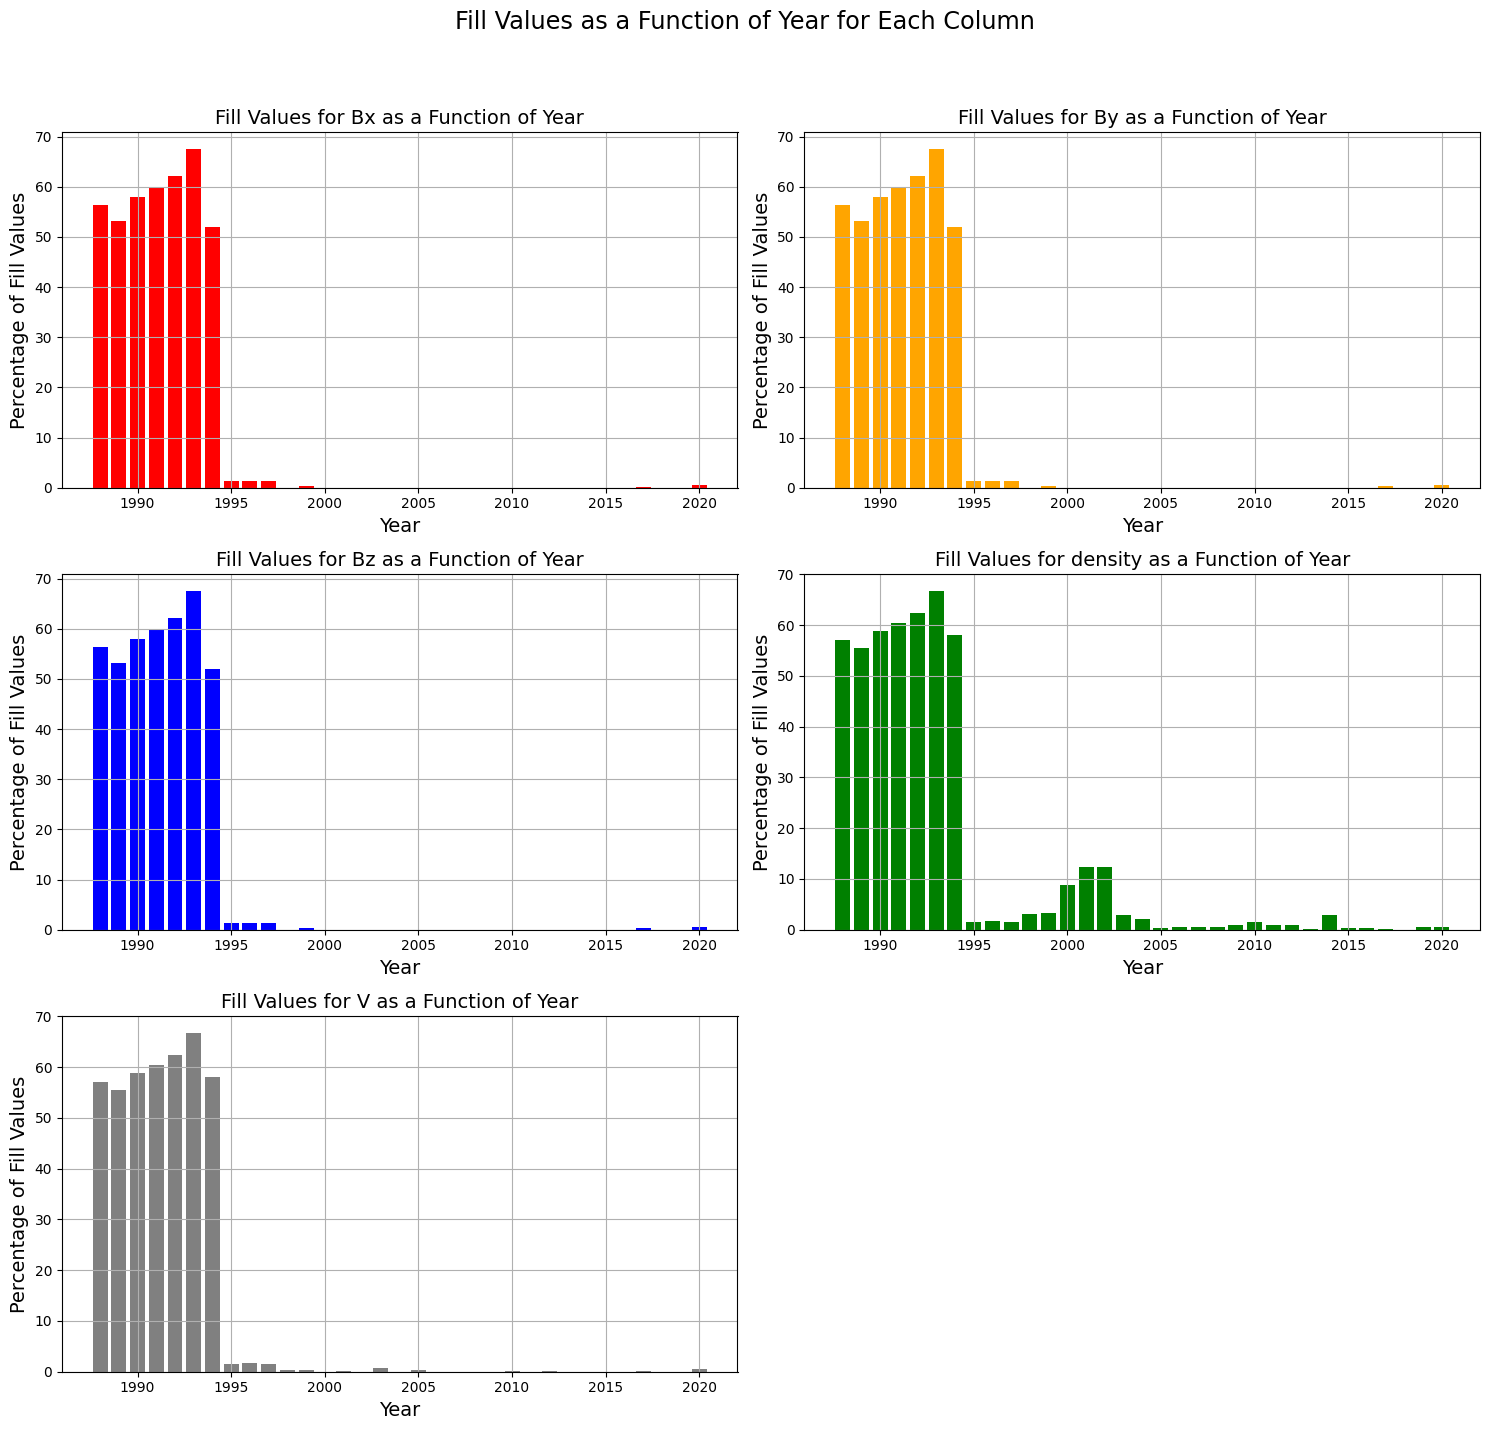

In [160]:
colors = ['red', 'orange', 'blue', 'green', 'grey', 'brown'] # Set list of colors for each histogram
fig, ax = plt.subplots(3, 2, figsize=(15, 15)) # Create a grid of subplots
ax = ax.flatten() # Convert the 2D array of subplots into a 1D array

for index, (column, fill_value) in enumerate(fill_values_dictionary.items()):
    """Iterate through the dictionary items"""
    if column != 'Dst': # Exclude the 'Dst' column, as there are not any fill values
        
        # Filter rows where the value in the column matches the fill value
        fill_rows = df[df[column] == fill_value]
        
        # Group by year and count the percentage of fill values
        fill_counts_by_year = fill_rows.groupby(df['time'].dt.year).size()
        total_counts_by_year = df.groupby(df['time'].dt.year).size()
        percentage_by_year = (fill_counts_by_year / total_counts_by_year) * 100
        
        # Plot fill values as a function of year
        ax[index].bar(percentage_by_year.index, percentage_by_year.values, color=colors[index])
        ax[index].set_title(f'Fill Values for {column} as a Function of Year', fontsize=14)
        ax[index].set_xlabel('Year', fontsize=14)
        ax[index].set_ylabel('Percentage of Fill Values', fontsize=14)
        ax[index].grid(True)

# Remove the last subplot
fig.delaxes(ax.flat[5])

fig.suptitle('Fill Values as a Function of Year for Each Column', fontsize='xx-large') # Set the title of Figure box
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for the title
plt.savefig('../reports/figures/fill_values.png') # save the figure
plt.show() # Show the plots

In [161]:
# Replace the every fill value with NaN value to remove them from data set
# with "dropna" function.

for column, fill_value in fill_values_dictionary.items():
    """Iterate through the dictionary items"""
    df[column] = df[column].replace(fill_value, np.nan)

In [162]:
# Check for the missing values
df.isna().sum()

time           0
Bx         36295
By         36321
Bz         36321
density    42004
V          37349
Dst            0
dtype: int64

In [163]:
# Drop the missing values
df_clean = df.dropna()
df_clean

,time,Bx,By,Bz,density,V,Dst
3,1988-01-01 03:00:00+00:00,4.1,-1.9,-0.5,14.6,282.0,-6
4,1988-01-01 04:00:00+00:00,5.3,-2.0,0.3,12.5,283.0,-6
5,1988-01-01 05:00:00+00:00,4.2,-3.8,0.1,16.3,282.0,-3
6,1988-01-01 06:00:00+00:00,3.5,-4.4,0.4,18.2,284.0,-4
7,1988-01-01 07:00:00+00:00,0.7,-2.0,2.0,20.5,296.0,-4
...,...,...,...,...,...,...,...
289291,2020-12-31 19:00:00+00:00,-0.7,-1.7,0.9,4.0,385.0,3
289292,2020-12-31 20:00:00+00:00,-0.6,-2.0,0.7,4.4,378.0,6
289293,2020-12-31 21:00:00+00:00,-0.1,-2.0,-0.2,4.4,373.0,4
289294,2020-12-31 22:00:00+00:00,2.3,-0.8,-0.4,4.4,363.0,3


### c) Numerical quantities

Now the histogram of numerical quantities will be produced

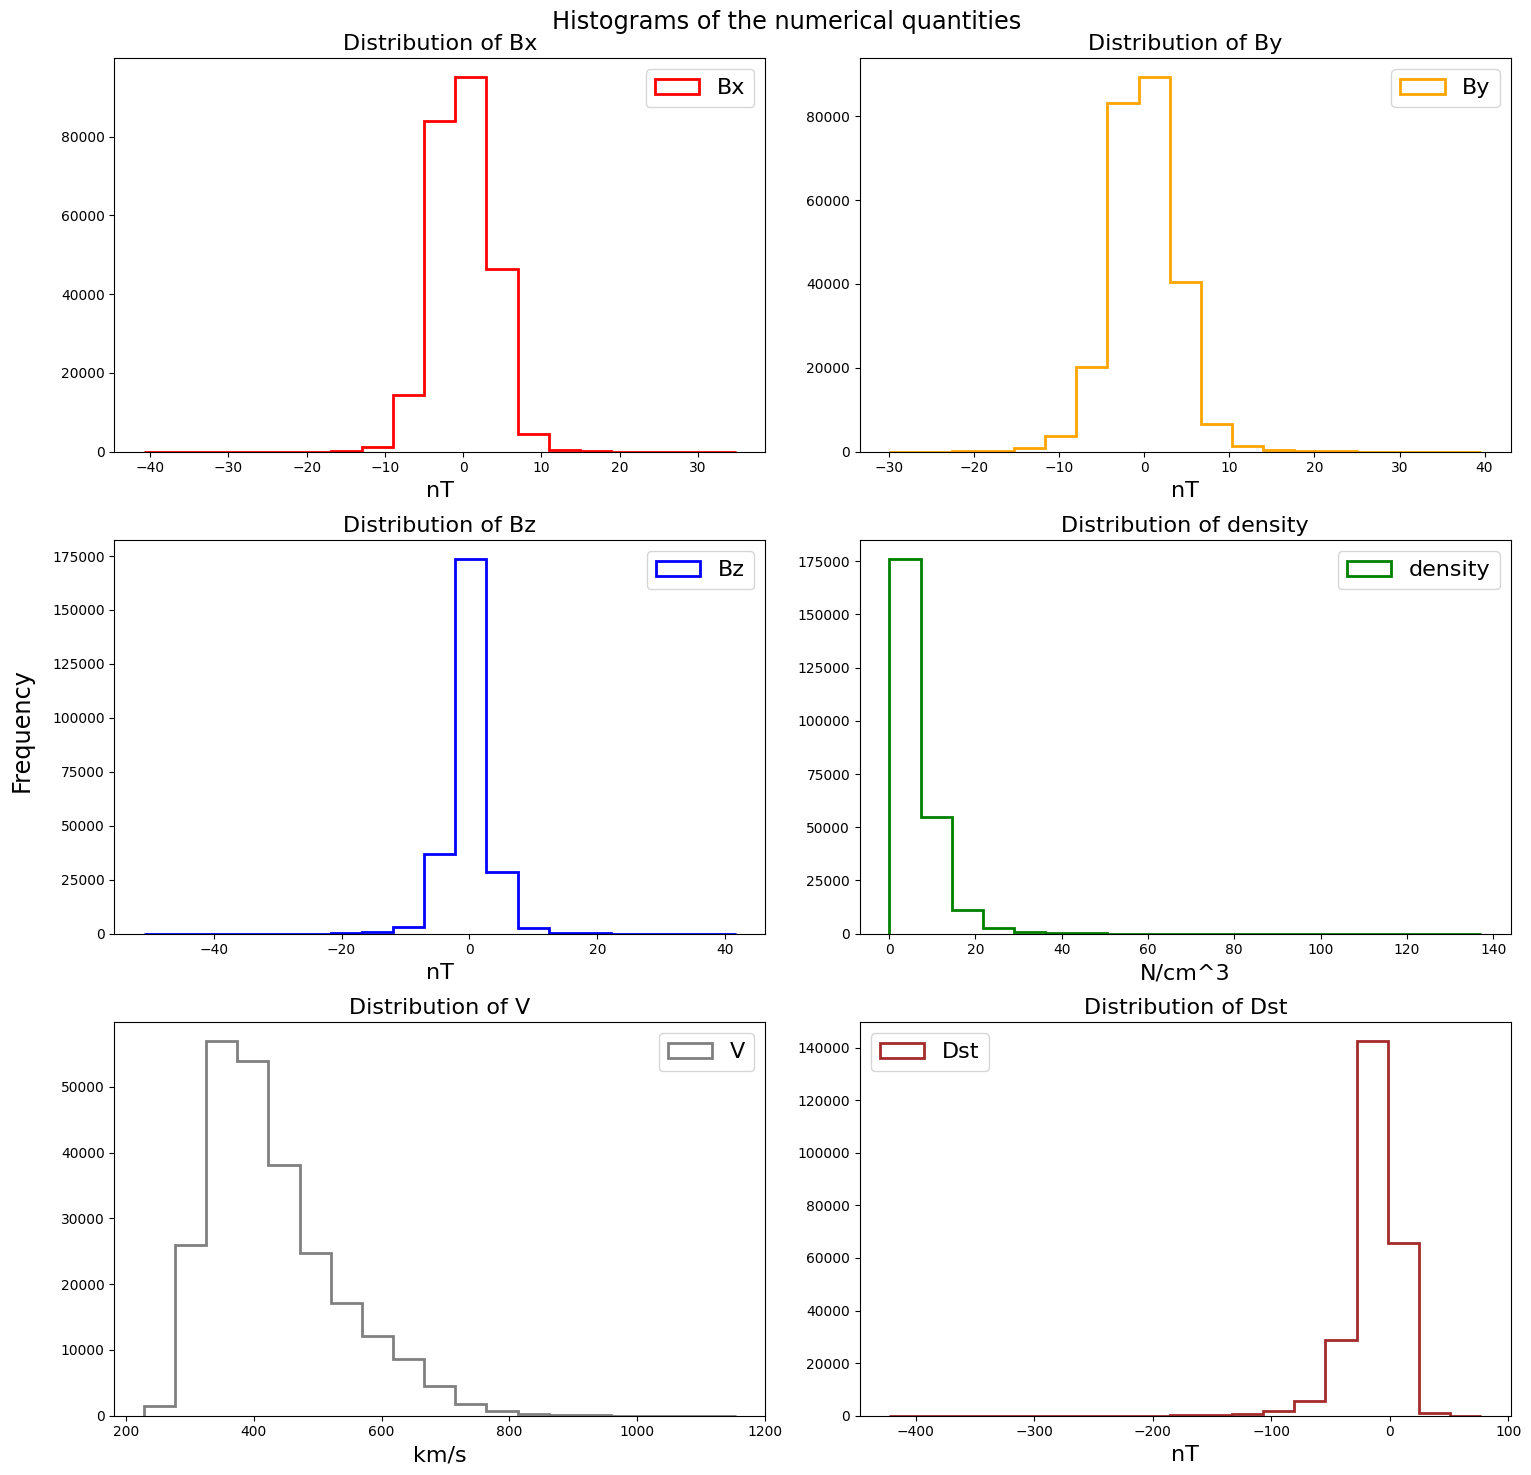

In [164]:
# Produce the histogram of main numerical quantities

units = ['nT', 'nT', 'nT', 'N/cm^3', 'km/s', 'nT'] # Set the lost of units

fig, ax = plt.subplots(3,2, figsize=(15, 15)) # Create a grid of subplots
ax = ax.flatten() # Convert the 2D (4x2) array of subplots (ax) into a 1D

for index, column in enumerate(df_clean.columns[1:]):
    """Iterate over index and value of each column"""
    binsN = 1 + math.ceil(math.log2(len(df_clean[column]))) # Calculate the number of bins
    ax[index].hist(df_clean[column], bins=binsN, label=column, linewidth=2, color = colors[index], linestyle = '-', histtype='step') # Plot one histogram per iteration
    ax[index].set_title(f'Distribution of {column}', fontsize=16)
    ax[index].set_xlabel(units[index], fontsize=16)
    ax[index].legend(fontsize=16) # Show the legend

fig.suptitle('Histograms of the numerical quantities', fontsize='xx-large') # Set the title of Figure box
fig.text(-0.01, 0.5, 'Frequency', ha='center', va='center', fontsize='xx-large', rotation='vertical') # Set the label and position of y-access

plt.tight_layout()
plt.savefig('../reports/figures/data_distribution.png')
plt.show()

### d) Main metrics for the numerical variables

In [165]:
# Produce the table of main metrics
main_metrics = pd.DataFrame({
    'Mean': df_clean[1:].mean(), #Calculate the mean
    'Median': df_clean[1:].median(), #Calculate the median
    'STD': df_clean[1:].std(), #Calculate the standard deviation
    'IQR': df_clean[1:].quantile(0.75) - df_clean[1:].quantile(0.25) # Calculate the interquartlie range 
})

main_metrics.transpose().drop(columns = ['time'])

,Bx,By,Bz,density,V,Dst
Mean,0.008291,0.003223,-0.033854,6.442488,431.556273,-12.990458
Median,0.0,0.0,0.0,5.0,408.0,-9.0
STD,3.523015,3.828936,3.015002,5.190981,102.117503,20.274161
IQR,5.1,4.8,2.9,4.8,130.0,20.0


### e) Correlations between the numerical variables

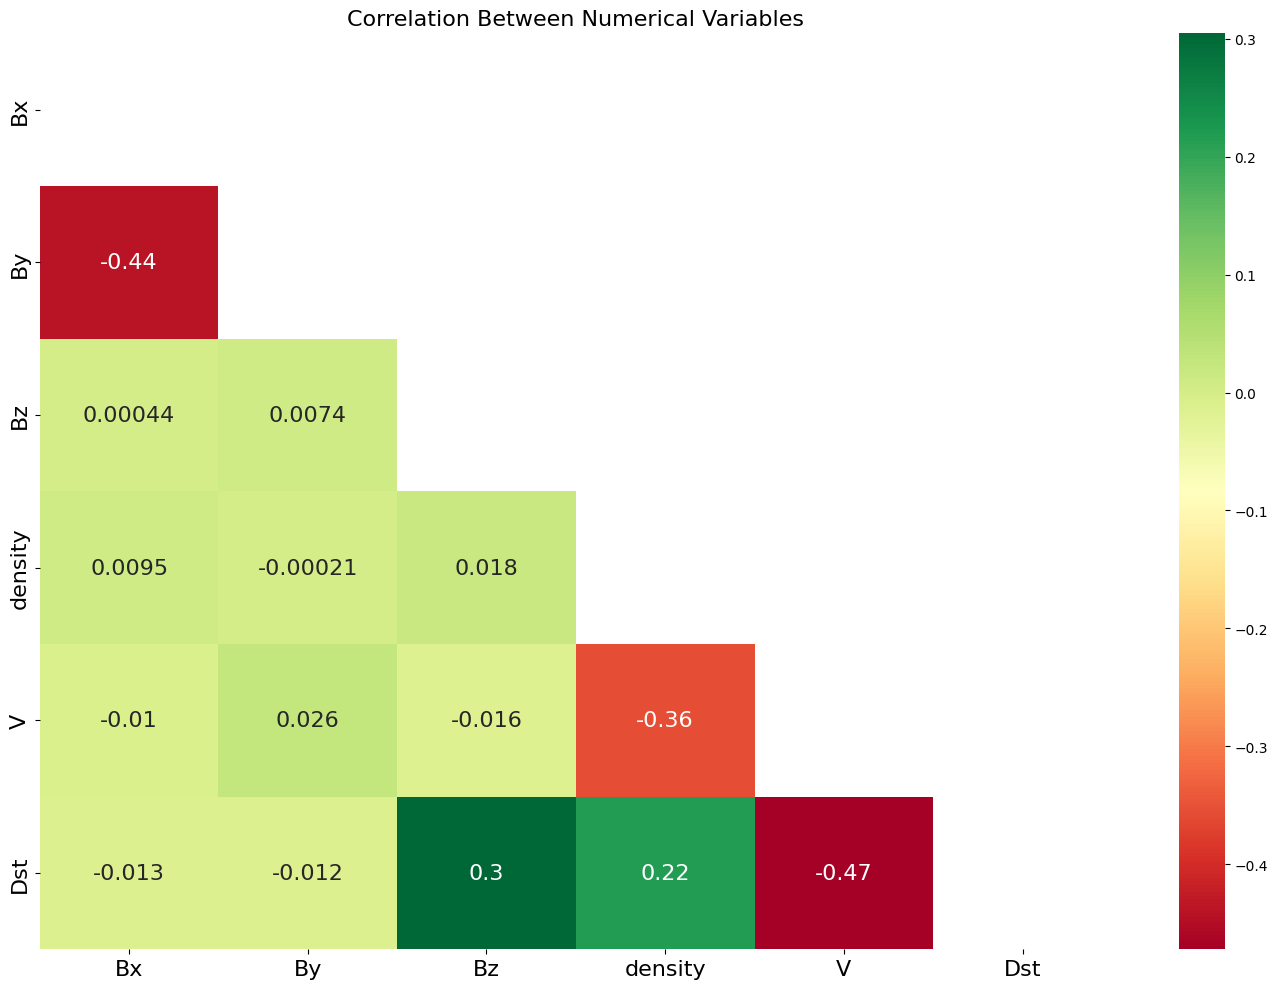

In [166]:
# Calculate the correlation matrix
cor_matrix = df_clean.corr(numeric_only = True)

plt.figure(figsize=(14, 10)) # Create the Figure cell for the matrix
mask = np.triu(np.ones_like(cor_matrix)) # Remove the upper correlation triangle (diagonal)
sns.heatmap(df_clean.corr(numeric_only=True), cmap="RdYlGn", mask=mask, annot=True, annot_kws={"fontsize": 16}) # Plot Pearson Correlation Matrix as a heatmap
plt.title('Correlation Between Numerical Variables', fontsize=16) # Set the title
plt.tick_params(axis='x', labelsize=16) # Increase font size of x-axis tick labels
plt.tick_params(axis='y', labelsize=16) # Increase font size of y-axis tick labels

plt.tight_layout()
plt.savefig('../reports/figures/correlation_matrix.png')
plt.show()

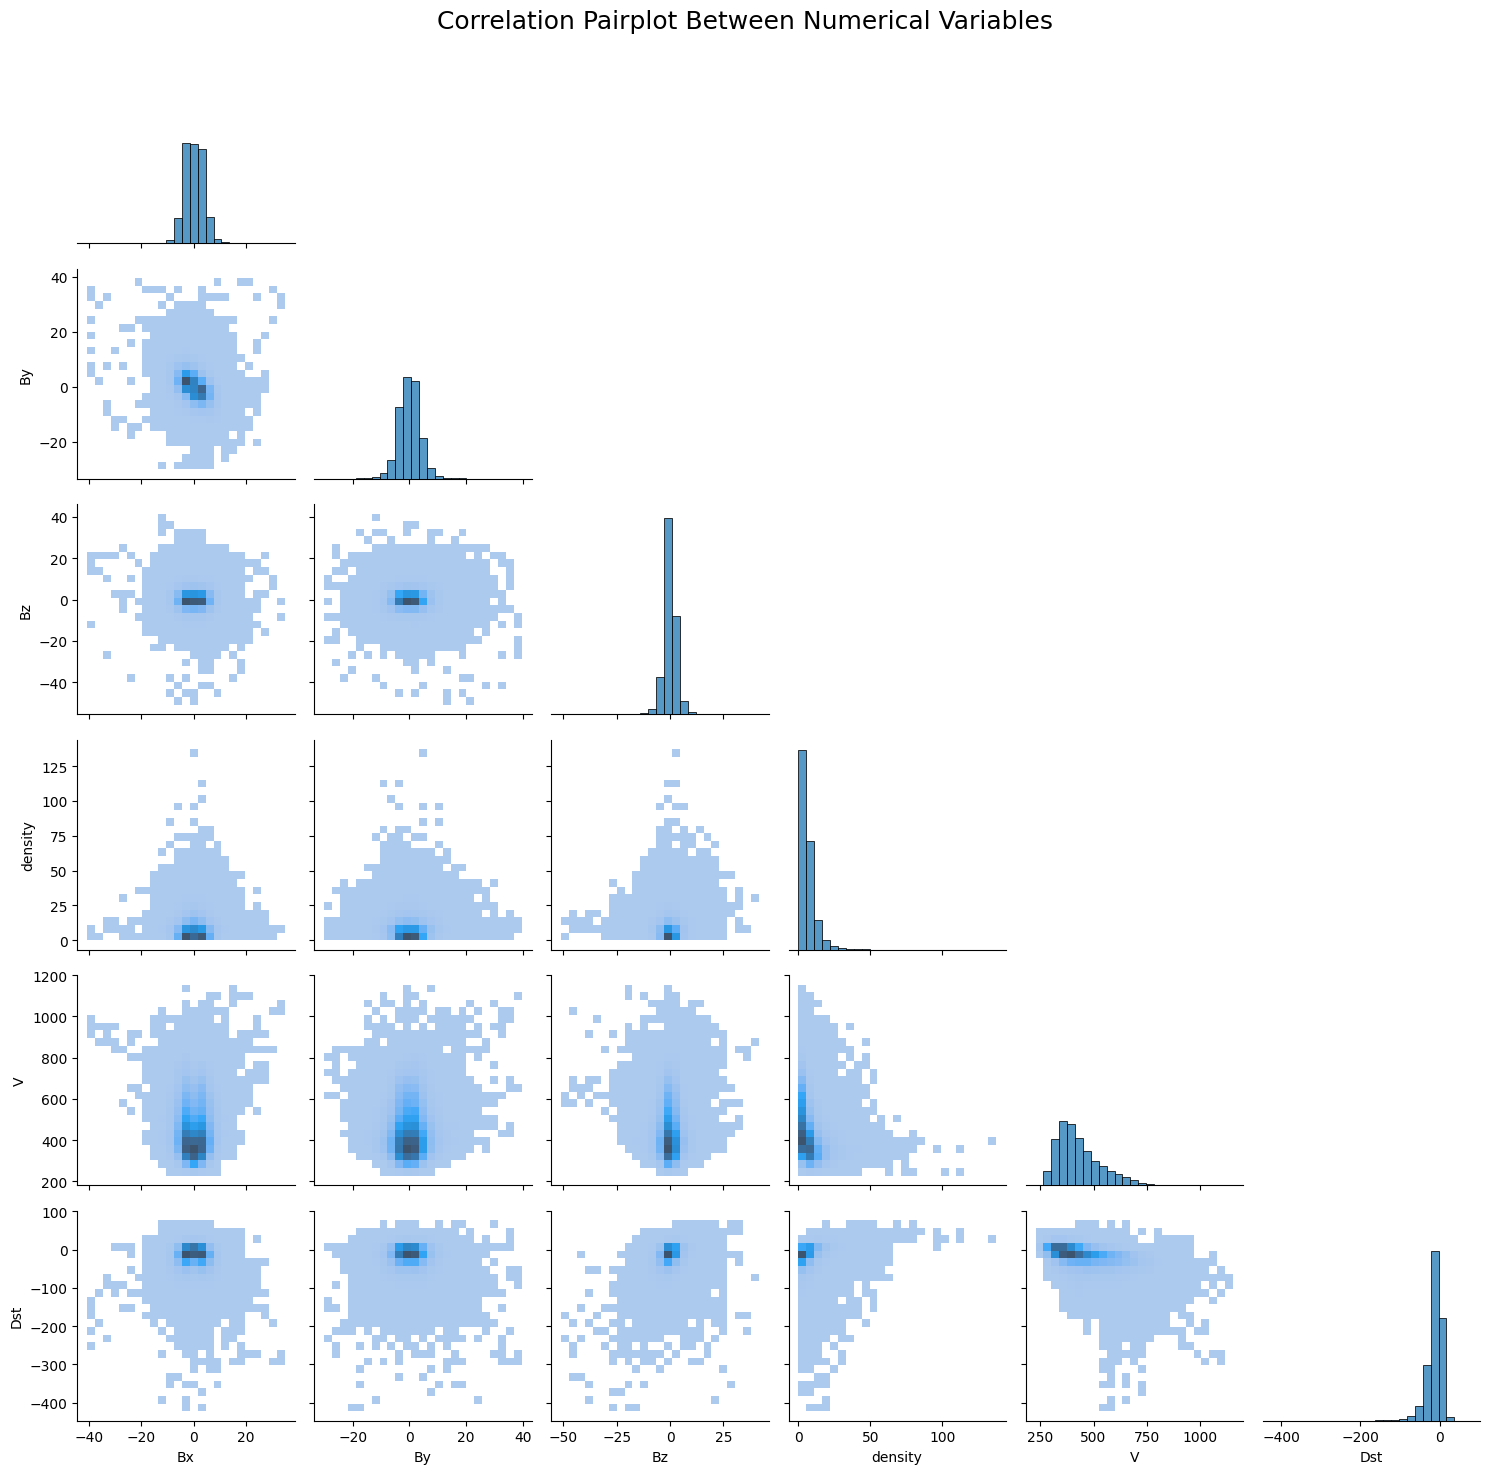

In [167]:
sns.pairplot(df_clean, kind='hist', plot_kws=dict(bins=25), diag_kws=dict(bins=25), corner=True) # Plot the grid of scatter plots

# Set the title on the middle top
plt.suptitle("Correlation Pairplot Between Numerical Variables", fontsize=18)

# Increase the font size of x and y axis labels
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.savefig('../reports/figures/correlation_pairplots.png')
plt.show()

### f) Adding log of the "density" to  the data set

In [168]:
# Calculate the log density values
log_density = round(np.log(df_clean['density']), 1)

# Insert the calculated values to the data set
df_interim = df_clean.copy()
df_interim.insert(5, "log_density", log_density)

# Display the final intermediate data
df_interim.head()

,time,Bx,By,Bz,density,log_density,V,Dst
3,1988-01-01 03:00:00+00:00,4.1,-1.9,-0.5,14.6,2.7,282.0,-6
4,1988-01-01 04:00:00+00:00,5.3,-2.0,0.3,12.5,2.5,283.0,-6
5,1988-01-01 05:00:00+00:00,4.2,-3.8,0.1,16.3,2.8,282.0,-3
6,1988-01-01 06:00:00+00:00,3.5,-4.4,0.4,18.2,2.9,284.0,-4
7,1988-01-01 07:00:00+00:00,0.7,-2.0,2.0,20.5,3.0,296.0,-4


In [169]:
# Make sure the data type remains the same
df_interim.info()

# Save the processed data
df_interim.to_csv('../data/interim/intermediate_data.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 246486 entries, 3 to 289295
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   time         246486 non-null  datetime64[ns, UTC]
 1   Bx           246486 non-null  float64            
 2   By           246486 non-null  float64            
 3   Bz           246486 non-null  float64            
 4   density      246486 non-null  float64            
 5   log_density  246486 non-null  float64            
 6   V            246486 non-null  float64            
 7   Dst          246486 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 16.9 MB


### g) Autocorrelation

To calculate the autocorrelation between the numerical variables the pandas autocorr() function is applied. Since autocorr() function takes lag parameter, which is the number of lags to apply before performing autocorrelation and it is supposed to be a single variable integer. Therefore, to perform the autocorrelation calculations for the given range (1, 1000) we need to create the list of the variables and iterate through the list performing the calculations.

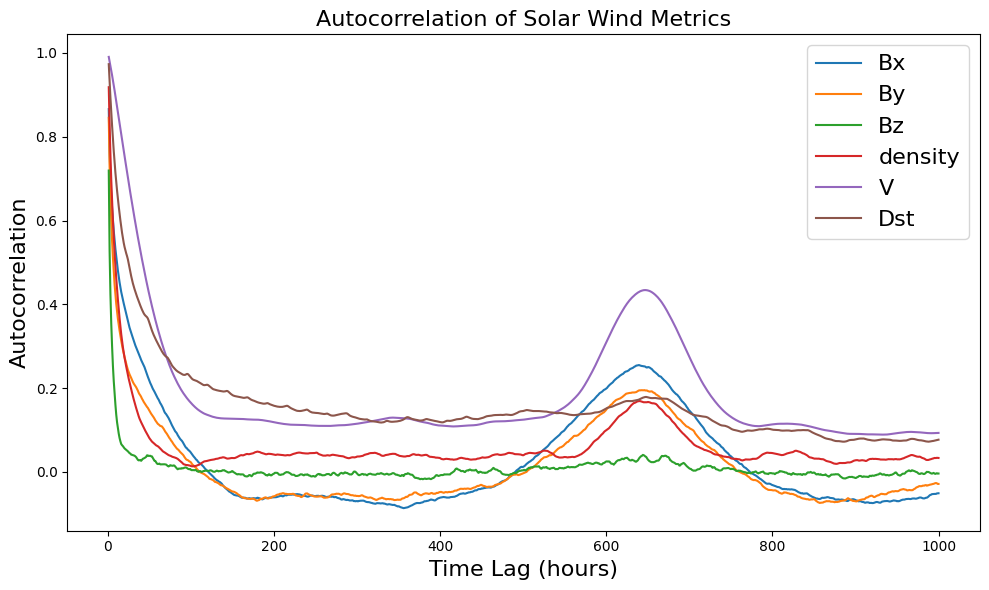

In [170]:
# Define the time lags
time_lags = range(1, 1001)

# Specify the columns for autocorrelation
columns = ['Bx', 'By', 'Bz', 'density', 'V', 'Dst']

# Calculate autocorrelation for each feature
autocorrelations = {}
for column in columns:  # Exclude the time column
    autocorrs = [df_interim[column].autocorr(lag=lag) for lag in time_lags]
    autocorrelations[column] = autocorrs

# Plot autocorrelations
plt.figure(figsize=(10, 6))
for column, autocorrs in autocorrelations.items():
    plt.plot(time_lags, autocorrs, label=column)

plt.title('Autocorrelation of Solar Wind Metrics', fontsize=16)
plt.xlabel('Time Lag (hours)', fontsize=16)
plt.ylabel('Autocorrelation', fontsize=16)
plt.legend(fontsize=16)

plt.tight_layout()
plt.savefig('../reports/figures/autoccorelation_plot.png')
plt.show()

# MODELING OF OMNI2 DATA

## 1. split the data set in a train and test samples.


The data set is splited the dataset in a training sample including all
records taken before 2020 and a testing sample including all records taken from
year 2020 on.

In [171]:
# Split the data set
train_df = df_interim[df_interim['time'].dt.year < 2020]
test_df = df_interim[df_interim['time'].dt.year >= 2020]

## 2. Linear Regression

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import OLSInfluence
import statsmodels.api as sm

### a) OLS Regression and its main statistics

In [173]:
# Prepare data
X_train = train_df.drop(columns=['time', 'Dst'])
y_train = train_df['Dst']

X_test = test_df.drop(columns=['time', 'Dst'])
y_test = test_df['Dst']

print("size of the train sample: ", X_train.shape[0])
print("size of the test sample: ", X_test.shape[0])
print(f"the test/train persantage is: {round((X_test.shape[0] / X_train.shape[0]) * 100, 2)} %")

size of the train sample:  237758
size of the test sample:  8728
the test/train persantage is: 3.67 %


In [174]:
# Adding a the intercept term
X_train_ols = sm.add_constant(X_train) # For train sample
X_test_ols = sm.add_constant(X_test) # For test sample

ols_model = sm.OLS(y_train, X_train_ols) # Set the model
ols_results = ols_model.fit() # Train the model on the train sample
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    Dst   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                 1.802e+04
Date:                Sun, 16 Feb 2025   Prob (F-statistic):               0.00
Time:                        00:29:20   Log-Likelihood:            -1.0107e+06
No. Observations:              237758   AIC:                         2.021e+06
Df Residuals:                  237751   BIC:                         2.022e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          24.6423      0.242    101.666      

In [175]:
# Making predictions
y_pred_test = ols_results.predict(X_test_ols) # For test sample
y_pred_train = ols_results.predict(X_train_ols) # For train sample

# Evaluate the main metrics for test sample
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Main metrics for test sample: ")
print("Test R-Squared for statsmodels OLS:", r2_test)
print("Test MSE for statsmodels OLS:", mse_test)
print("Test RMSE for statsmodels OLS:", np.sqrt(mse_test))
print("Test MAE for statsmodels OLS:", mae_test)

# Evaluate the main metrics for train sample
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

print("\nMain metrics for train sample: ")
print("Traingn R-Squared for statsmodels OLS:", r2_train)
print("Traingn MSE for statsmodels OLS:", mse_train)
print("Traingn RMSE for statsmodels OLS:", np.sqrt(mse_train))
print("Traingnt MAE for statsmodels OLS:", mae_train)

Main metrics for test sample: 
Test R-Squared for statsmodels OLS: 0.1768196362359319
Test MSE for statsmodels OLS: 101.82783772927043
Test RMSE for statsmodels OLS: 10.09097803630899
Test MAE for statsmodels OLS: 7.654679695154423

Main metrics for train sample: 
Traingn R-Squared for statsmodels OLS: 0.31262076992013355
Traingn MSE for statsmodels OLS: 288.3705774267776
Traingn RMSE for statsmodels OLS: 16.981477480678105
Traingnt MAE for statsmodels OLS: 11.162615177992963


### b) Influence Plot

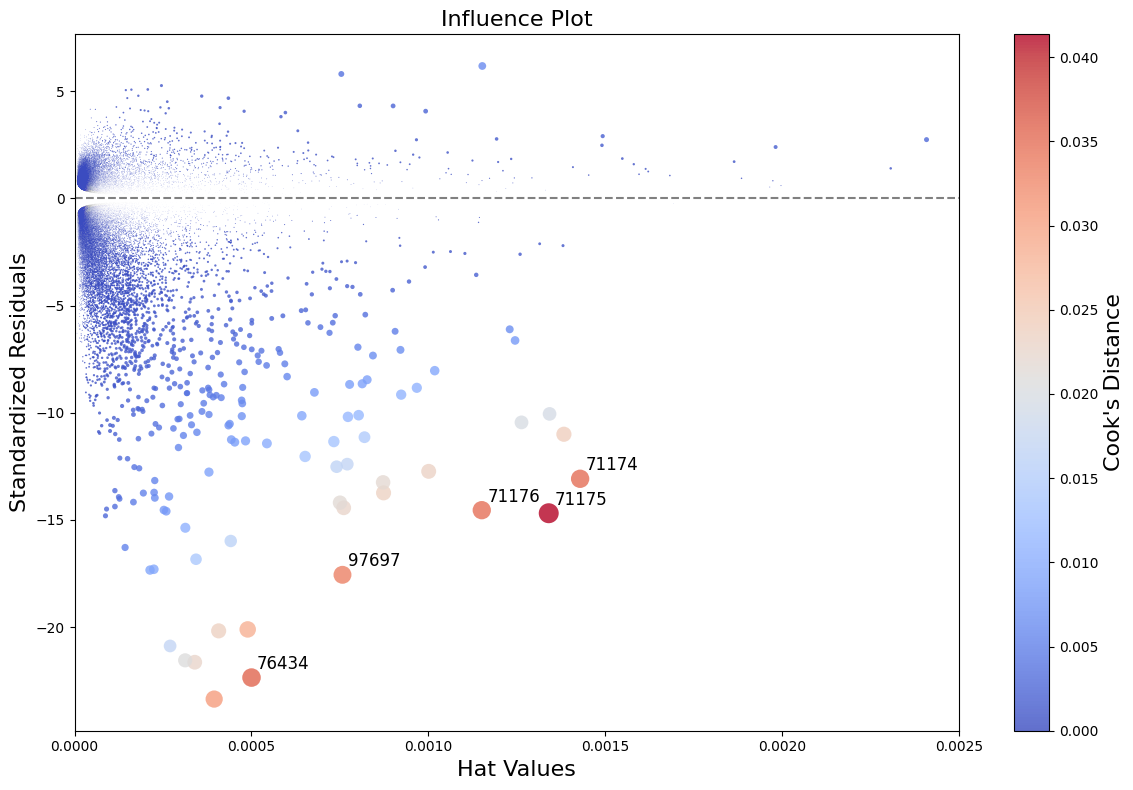

In [176]:
# Generate influence measures
influence = ols_results.get_influence()

# Obtain the values of standardized residuals, hat values, and Cook's distance
standardized_residuals = influence.resid_studentized_internal
hat_values = influence.hat_matrix_diag
cooks_distance = influence.cooks_distance[0]

# Create the plot with point sizes proportional to Cook's distance
plt.figure(figsize=(12, 8))
plt.scatter(hat_values, standardized_residuals, s=cooks_distance * 5000, # Apply multiplication factor of 5000 to make the bubbles larger
            c=cooks_distance, cmap='coolwarm', edgecolors='none', # Avoid outlines for better visualization
            linewidths=1, alpha=0.8)
plt.xlabel('Hat Values', fontsize=16)
plt.ylabel('Standardized Residuals', fontsize=16)
plt.title('Influence Plot', fontsize=16)
plt.xlim(0, 0.0025)

# Add horizontal line at 0
plt.axhline(y=0, linestyle='--', color='grey')

# As there are thousands of the points on the plot it might be difficult to initialize the point by the size, as the size differences may be negligible
# therefore it was decided to add additional color bar and the the specific color to the bubble size.
cbar = plt.colorbar()
cbar.set_label("Cook's Distance", fontsize=16)

# Identify the indices of the largest Cook's distance values
top_n = 5  # Number of top influential points to label
largest_indices = np.argsort(cooks_distance)[-top_n:] # Get the top of the sorted Cook's distances in increasing order

# As .scatter() function outputs the plot of the bubbles, where the index of each bubbles corresponds to the row index in data set,
# however, the output is produced without title specification for the bubbles, so it is impossible to determine what a certain point refers to.
# Therefore, it was decided to output the titles with row index for the top largest dots, that have the most significant influence.

# Set the title on the plot for the largest bubbles
for index in largest_indices:
    plt.annotate(index, (hat_values[index], standardized_residuals[index]), 
                 xytext=(4,6), textcoords='offset points', # avoid overlapping the points
                 fontsize=12, color='black')

plt.tight_layout()
plt.savefig('../reports/figures/influece_plot.png')
plt.show()

In [177]:
# Now for the each of the top bubbles we can determine the row in data set, which corresponds to the index

# List of indices to display
indices = [71175, 71174, 71176, 97697, 76434]

# Display the rows as a DataFrame
selected_rows = df_interim.iloc[indices]
display(selected_rows)

,time,Bx,By,Bz,density,log_density,V,Dst
109921,2000-07-16 01:00:00+00:00,30.4,34.7,10.5,2.1,0.7,1012.0,-300
109920,2000-07-16 00:00:00+00:00,34.8,31.8,-2.5,8.1,2.1,1030.0,-300
109922,2000-07-16 02:00:00+00:00,23.8,33.5,17.9,1.3,0.3,970.0,-278
139266,2003-11-20 18:00:00+00:00,-3.1,-12.0,-37.5,18.7,2.9,580.0,-396
116121,2001-03-31 09:00:00+00:00,-3.1,14.9,28.9,19.8,3.0,589.0,-346


- Geomagnetic storm in 14-16th of June 2001
- Halloween storm (October 2003 - November 2003)
- Geomagnetic Storm March - April 2001

### c) Residuals and Predicted Values

Histogram of the residuals from the regression and a plot of the
absolute value of the residuals versus the predicted values.

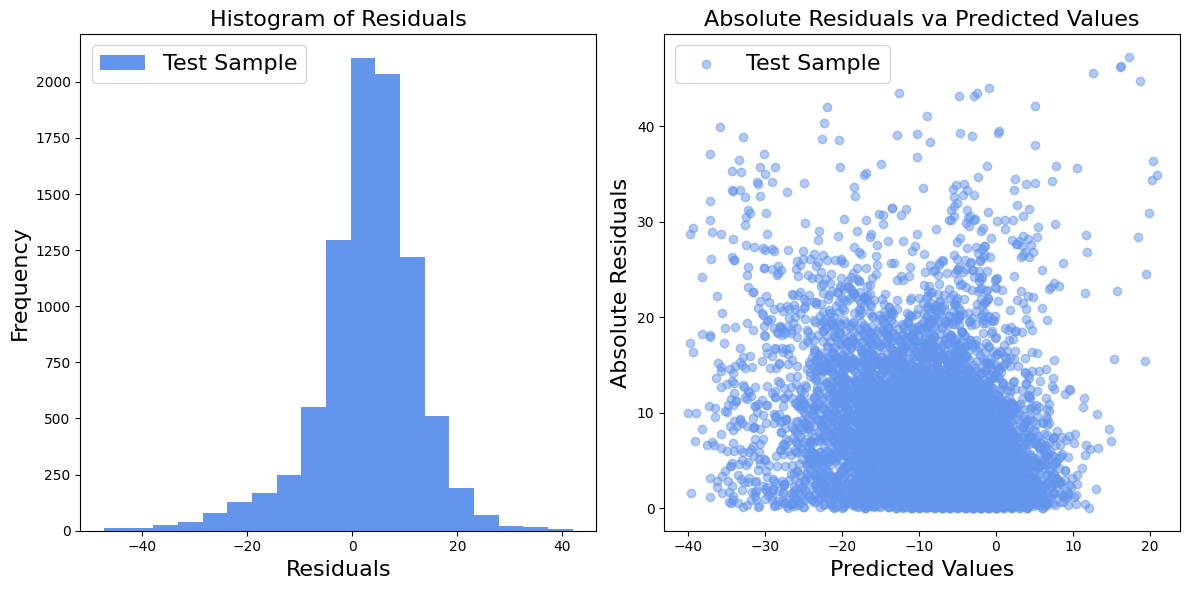

In [178]:
# Calculate the residuals

# For test sample
residuals = y_test - y_pred_test
abs_residuals = np.abs(residuals)

# Set the figure grid
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
binsN_test = 1 + math.ceil(math.log2(len(residuals))) # Calculate the number of bins

# Plot the residuals
ax[0].hist(residuals, bins=binsN, label='Test Sample', color='cornflowerblue')
ax[0].set_title('Histogram of Residuals', fontsize=16)
ax[0].set_xlabel('Residuals', fontsize=16)
ax[0].set_ylabel('Frequency', fontsize=16)
ax[0].legend(fontsize=16)

# Plot the absolute residuals vs predicted values
# If the linear regression model is a good fit for the data,
# the residual plot should show a random scatter of the points around zero with no discernible trend
ax[1].scatter(y_pred_test, abs_residuals, alpha=0.5, label='Test Sample', color='cornflowerblue')
ax[1].set_title('Absolute Residuals va Predicted Values', fontsize=16)
ax[1].set_xlabel('Predicted Values', fontsize=16)
ax[1].set_ylabel('Absolute Residuals', fontsize=16)
ax[1].legend(fontsize=16)

plt.tight_layout()
plt.savefig('../reports/figures/residuals_plot.png')
plt.show()

### c) Partial residuals plot 

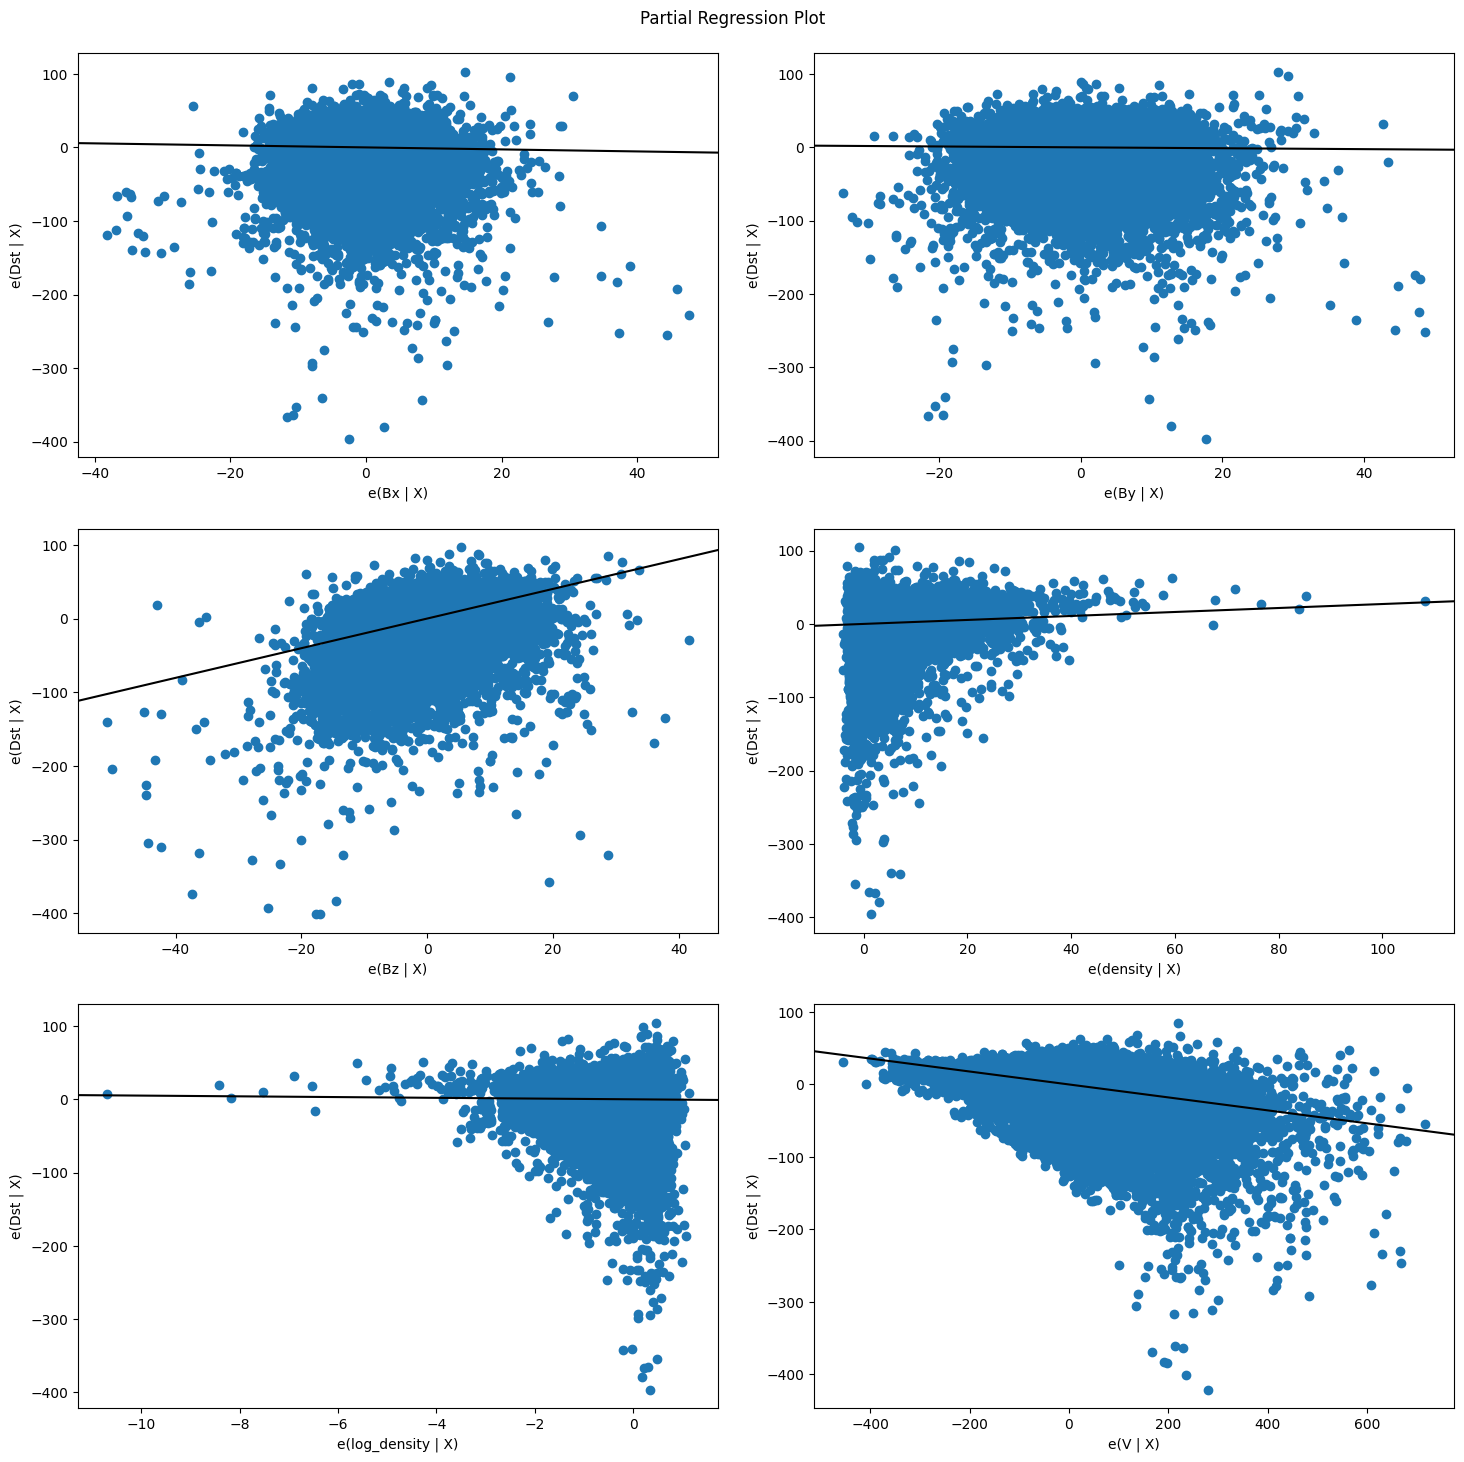

In [179]:
# Get the names of all features (excluding the constant if present)
features = ols_results.model.exog_names[1:]  # Exclude the intercept term

# Plot partial residual plots for selected features
fig = plt.figure(figsize=(15, 15))
sm.graphics.plot_partregress_grid(ols_results, exog_idx=features, fig=fig)

plt.tight_layout(pad=2.0)
plt.savefig('../reports/figures/partial_residuals.png')
plt.show()

### e) Backward elimination

Returning back to the main regression metrics obtained above, we can see, that all predictors (features) have p-value around zero. Therefore we need to use other metrics such as t-value and std error to chose the predictor that will be dropped.

It was decided to remove log_density, By, Bx, density one-by-one as those predictors have relatively large std error and small t-value.

In [180]:
# Run a backward elimination method on the training set to rank the features in order of importance

# List of predictor subsets
predictor_subsets = [
    ["Bx", "By", "Bz", "density", "V"],
    ["Bx", "Bz", "density", "V"],
    ["Bz", "density", "V"],
    ["Bz", "V"]
]

# Perform linear regression for each subset
ols_results_list = []
for subset in predictor_subsets:
    X_train_subset = sm.add_constant(X_train[subset])
    ols_model = sm.OLS(y_train, X_train_subset)
    ols_results = ols_model.fit()
    ols_results_list.append(ols_results)

In [181]:
# Print summary for each regression model
for i, ols_results in enumerate(ols_results_list):
    print(f"\nSUBSET {i+1}:")
    print(ols_results.summary())
    print()


SUBSET 1:
                            OLS Regression Results                            
Dep. Variable:                    Dst   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                 2.162e+04
Date:                Sun, 16 Feb 2025   Prob (F-statistic):               0.00
Time:                        00:29:24   Log-Likelihood:            -1.0107e+06
No. Observations:              237758   AIC:                         2.021e+06
Df Residuals:                  237752   BIC:                         2.022e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.9082      0.183    130.9

Therefore the last model, that has two predictors (Bz and V) is almost as well fitted (R2: 0.309) as original model with 6 predictors (R2: 0.313) based on the train sample. However both of this models have poor performance as they have relatively R-Squared vale (around 30%).

## 3. Principal Component Analysis (PCA)

In [182]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [183]:
# Data standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA
pca = PCA()
pca.fit(X_train_scaled)

# Obtain the weights
loadings = pca.components_

In [184]:
explained_variance = pd.DataFrame(pca.explained_variance_)

# Calculate the cumulative sum of explained variance
ev_ration = pd.DataFrame(pca.explained_variance_ratio_)
evr_sum = pca.explained_variance_ratio_.cumsum()
print('explained_variance_ration: ', ev_ration.round(3))
print('\nexplained_variance_ration_cimulative: ', evr_sum.round(3))

# Define the function for the trashold
def find_index(vector, threshold):
    for i, component in enumerate(vector):
        if component > threshold:
            return i
    return -1

threshold = 0.80
index = find_index(evr_sum, threshold)
print("\nIndex: ", index)
print("Sum: ", evr_sum[index].round(3))

explained_variance_ration:         0
0  0.360
1  0.240
2  0.167
3  0.120
4  0.093
5  0.020

explained_variance_ration_cimulative:  [0.36  0.601 0.767 0.887 0.98  1.   ]

Index:  3
Sum:  0.887


### a) Scree Plot

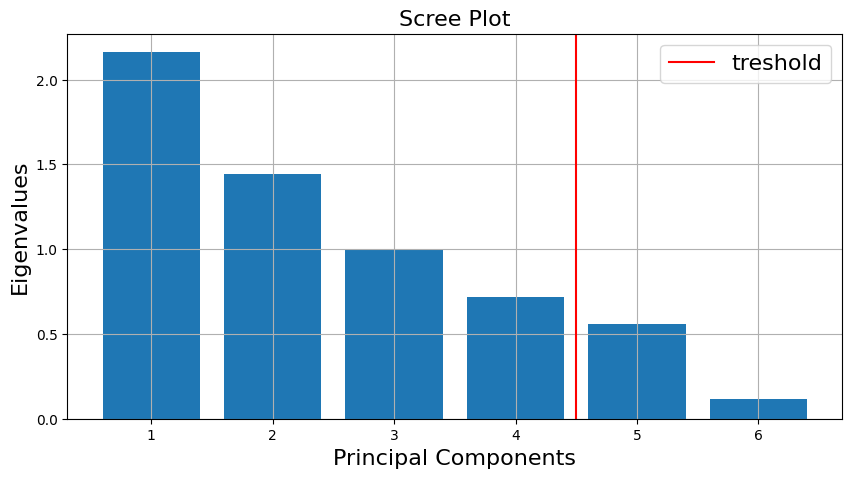

In [185]:
explained_variance = pca.explained_variance_

# Screen Plot
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.axvline(index+1.5, color='r', label='treshold')
plt.ylabel('Eigenvalues', fontsize=16)
plt.xlabel('Principal Components', fontsize=16)
plt.title('Scree Plot', fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

plt.savefig('../reports/figures/scree_plot.png')
plt.show()

### b) Weights Plot

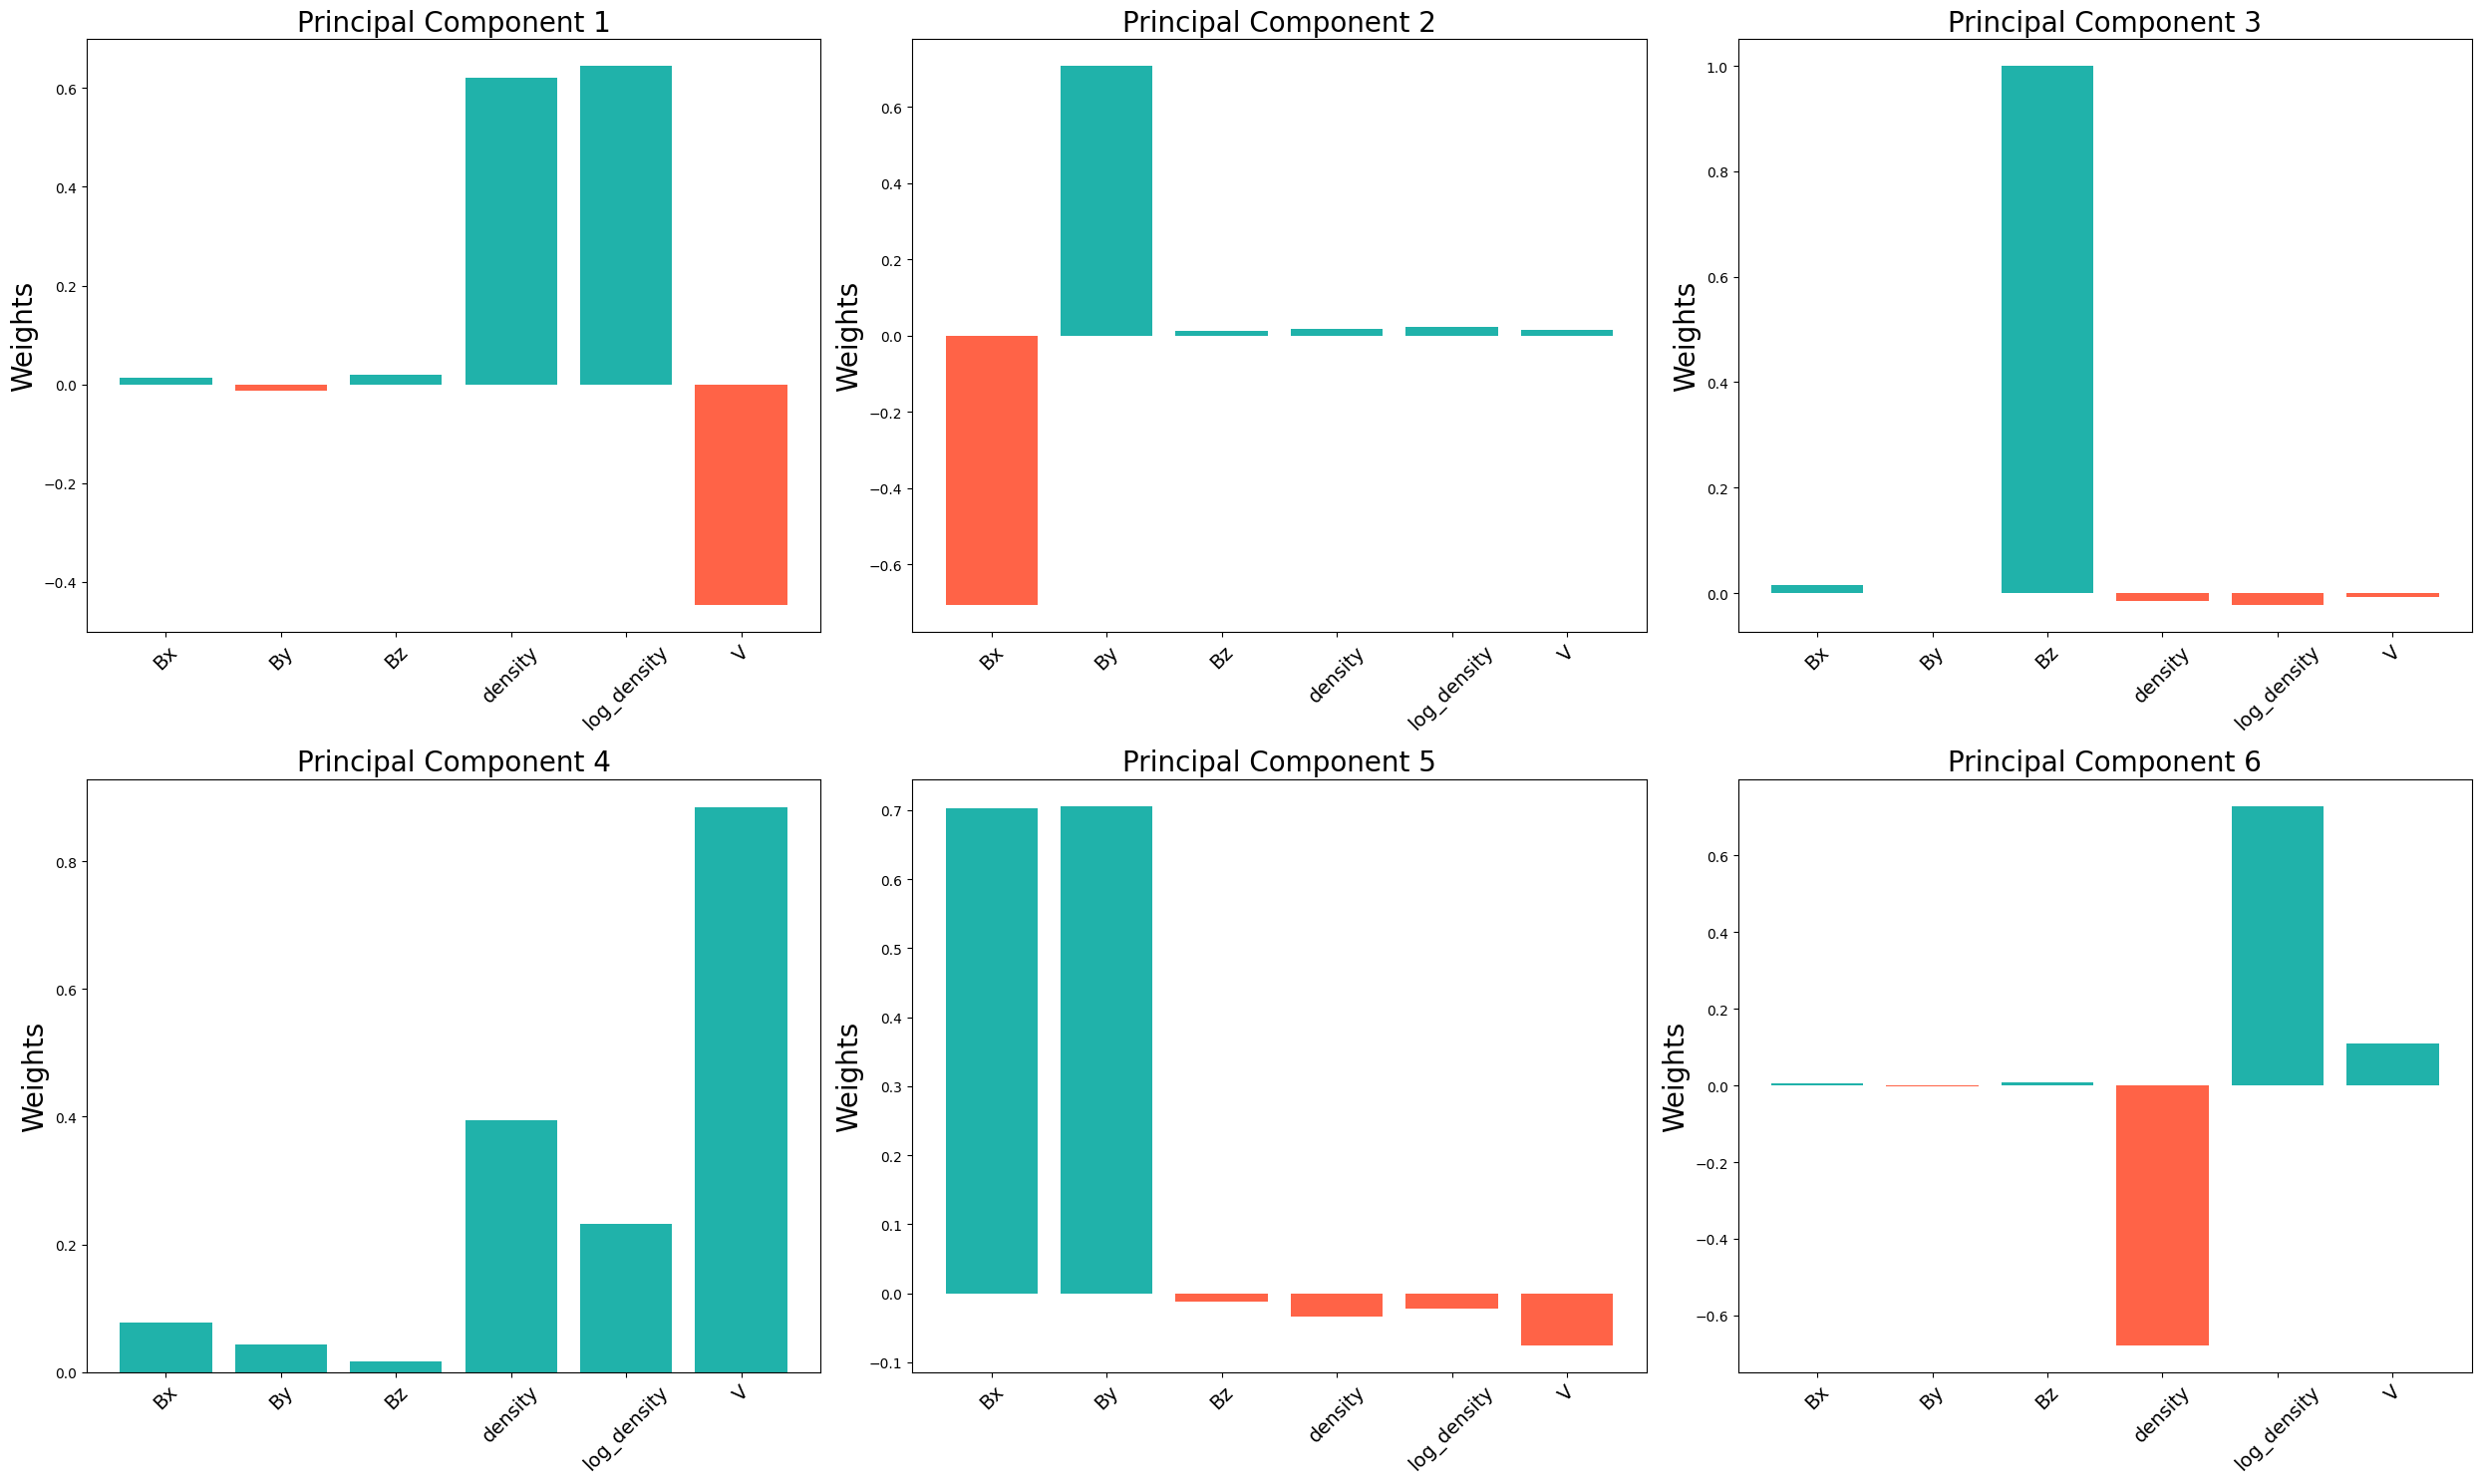

In [186]:
fig, ax = plt.subplots(2, 3, figsize=(25, 15))  # Create a grid of subplots
ax = ax.flatten()

for index in range(loadings.shape[0]):
    # Get the current loadings for the principal component
    current_loadings = loadings[index]
    
    # Define colors based on positive or negative values
    colors = ['lightseagreen' if value > 0 else 'tomato' for value in current_loadings]
    
    # Create the bar plot with the specified colors
    ax[index].bar(range(len(current_loadings)), current_loadings, color=colors)
    ax[index].set_title(f'Principal Component {index + 1}', fontsize=20)
    ax[index].set_ylabel('Weights', fontsize=20)
    ax[index].set_xticks(range(len(X_train.columns)))
    ax[index].set_xticklabels(X_train.columns, rotation=45, fontsize=14)

plt.tight_layout()
plt.savefig('../reports/figures/weights_plot.png')
plt.show()

In [187]:
# Perform weights as a data frame 
loadings = pd.DataFrame(pca.components_, columns=X_train.columns)
print(loadings.round(3))

      Bx     By     Bz  density  log_density      V
0  0.014 -0.012  0.020    0.621        0.644 -0.447
1 -0.706  0.707  0.012    0.017        0.022  0.015
2  0.016 -0.000  0.999   -0.014       -0.023 -0.007
3  0.078  0.042  0.016    0.394        0.232  0.885
4  0.703  0.706 -0.013   -0.034       -0.021 -0.075
5  0.005 -0.004  0.008   -0.677        0.728  0.110


## 4.  Classification

### a) Adding of "Dst_label" categorical variable

As the “Dst” variable measures the strength of geomagnetic storms it is used to classify geomagnetic storms. The categorical variable “Dst label” will be added to the data set, which is True when the Geomagnetic “Dst” index has values below −20 nT and False when the Geomagnetic “Dst” index has values equal or above −20 nT.

In [188]:
# Make a copy of the DataFrame to avoid SettingWithCopyWarning
df_sample = df_interim.copy()

# Add the 'Dst_label' to the data set using pandas accessor:
df_sample.loc[:, 'Dst_label'] = df['Dst'] < -20

# Check the result
print(df_sample['Dst_label'].describe())
print(df_sample)

count     246486
unique         2
top        False
freq      184752
Name: Dst_label, dtype: object
                            time   Bx   By   Bz  density  log_density      V  \
3      1988-01-01 03:00:00+00:00  4.1 -1.9 -0.5     14.6          2.7  282.0   
4      1988-01-01 04:00:00+00:00  5.3 -2.0  0.3     12.5          2.5  283.0   
5      1988-01-01 05:00:00+00:00  4.2 -3.8  0.1     16.3          2.8  282.0   
6      1988-01-01 06:00:00+00:00  3.5 -4.4  0.4     18.2          2.9  284.0   
7      1988-01-01 07:00:00+00:00  0.7 -2.0  2.0     20.5          3.0  296.0   
...                          ...  ...  ...  ...      ...          ...    ...   
289291 2020-12-31 19:00:00+00:00 -0.7 -1.7  0.9      4.0          1.4  385.0   
289292 2020-12-31 20:00:00+00:00 -0.6 -2.0  0.7      4.4          1.5  378.0   
289293 2020-12-31 21:00:00+00:00 -0.1 -2.0 -0.2      4.4          1.5  373.0   
289294 2020-12-31 22:00:00+00:00  2.3 -0.8 -0.4      4.4          1.5  363.0   
289295 2020-12-31 23:

### b) Balancing of the sample

To perform the balancing, the dataset will be divided into two subsets: the first will contain data with Dst_label = True, and the second with Dst_label = False. Then, after comparing the sizes of the subsets, one of them will be undersampled or upsampled to match the size of the other. After that, both subsets will be combined back into a single dataset.

In [189]:
# Splitting the data into two subsets
df_storm = df_sample[df_sample['Dst_label'] == True]
df_no_storm = df_sample[df_sample['Dst_label'] == False]

print("Size of df_storm subset: ", df_storm.shape[0])
print("Size of df_no_storm subset: ", df_no_storm.shape[0])
print(f"Imbalance: {round((df_no_storm.shape[0] / df_sample.shape[0]) * 100, 2)} %")

Size of df_storm subset:  61734
Size of df_no_storm subset:  184752
Imbalance: 74.95 %


As there is such significant imbalance for the df_no_storm subset, it is better to undersample it with random dropping of some values, rather than upsample df_storm sample with generating a large number of random values

In [190]:
# Undersample the df_no_strom subset
df_no_storm = df_no_storm.sample(n=len(df_storm)) # Undersample to the same size as df_storm

# Concatenating the undersampled data
df_processed = pd.concat([df_storm, df_no_storm])

# Checking the new balance of the classes
print(df_processed['Dst_label'].value_counts())
print(df_processed.describe())

# Save the processed data
df_processed.to_csv('../data/processed/processed_data.csv', index=False)

Dst_label
True     61734
False    61734
Name: count, dtype: int64
                  Bx             By             Bz        density  \
count  123468.000000  123468.000000  123468.000000  123468.000000   
mean        0.021857       0.019605      -0.391843       6.048102   
std         3.807355       4.129878       3.375073       4.970607   
min       -40.800000     -30.000000     -50.900000       0.100000   
25%        -2.800000      -2.500000      -1.900000       3.000000   
50%         0.000000       0.000000      -0.300000       4.600000   
75%         2.800000       2.600000       1.300000       7.400000   
max        34.800000      39.600000      41.600000      98.200000   

         log_density              V            Dst  
count  123468.000000  123468.000000  123468.000000  
mean        1.554448     456.353079     -21.464833  
std         0.695535     110.660773      24.324893  
min        -2.300000     228.000000    -422.000000  
25%         1.100000     372.000000     -31.000

### c) Naive Bayes, Linear Discriminant Analysis (LDA) and Logistic Regression

In [191]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from dmba import classificationSummary

In [192]:
#display plots inline
%matplotlib inline

In [193]:
# Split the data set back to train and test samples by the year
train_df = df_processed[df_processed['time'].dt.year < 2020]
test_df = df_processed[df_processed['time'].dt.year >= 2020]

# Prepare data
X_train = train_df.drop(columns=['time', 'Dst', 'Dst_label'])
y_train = train_df['Dst_label']

X_test = test_df.drop(columns=['time', 'Dst', 'Dst_label'])
y_test = test_df['Dst_label']

print("size of the train sample: ", X_train.shape[0])
print("size of the test sample: ", X_test.shape[0])
print(f"the test/train persantage is: {round((X_test.shape[0] / X_train.shape[0]) * 100, 2)} %")

size of the train sample:  119960
size of the test sample:  3508
the test/train persantage is: 2.92 %


#### 1) Naive Bayes

In [194]:
# Initialize the Gaussian Naive Bayes classifier
model_gnb = GaussianNB()

# Train the model on the training data and making predictions on the test set
y_pred_gnb = model_gnb.fit(X_train, y_train).predict(X_test)

# Output the model performance
mislabelled = (y_test != y_pred_gnb).sum()
print(f"Mislabeled points out of a total {X_test.shape[0]} points: {mislabelled}")
print(f"The percentage of mislabeled points: {round((mislabelled / X_test.shape[0]) * 100,2)} %\n")

# Computing the Area Under the ROC Curve (AUC) for the test set
auc_score_gnb = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

# Output the classification report
print(classification_report(y_test, y_pred_gnb))
print("AUC-ROC: ", round(auc_score_gnb, 3))
print('\nConfusion matrix for testing sample')
classificationSummary(y_test, model_gnb.predict(X_test),
                     class_names=model_gnb.classes_)

Mislabeled points out of a total 3508 points: 689
The percentage of mislabeled points: 19.64 %

              precision    recall  f1-score   support

       False       0.84      0.91      0.87      2614
        True       0.66      0.48      0.56       894

    accuracy                           0.80      3508
   macro avg       0.75      0.70      0.71      3508
weighted avg       0.79      0.80      0.79      3508

AUC-ROC:  0.768

Confusion matrix for testing sample
Confusion Matrix (Accuracy 0.8036)

       Prediction
Actual False  True
 False  2389   225
  True   464   430


#### 2) Linear Discriminant Analysis (LDA)

In [195]:
# Initialize the LDA classifier
model_lda = LinearDiscriminantAnalysis()

# Train the model on the training data and making predictions on the test set
y_pred_lda = model_lda.fit(X_train, y_train).predict(X_test)

# Computing the Area Under the ROC Curve (AUC) for the test set
auc_score_lda = roc_auc_score(y_test, model_lda.predict_proba(X_test)[:, 1])

# Output the classification report
print(classification_report(y_test, y_pred_lda))
print("AUC-ROC: ", round(auc_score_lda, 3))
print('\nConfusion matrix for testing sample')
classificationSummary(y_test, model_lda.predict(X_test),
                     class_names=model_lda.classes_)

              precision    recall  f1-score   support

       False       0.84      0.88      0.86      2614
        True       0.59      0.50      0.54       894

    accuracy                           0.78      3508
   macro avg       0.71      0.69      0.70      3508
weighted avg       0.77      0.78      0.78      3508

AUC-ROC:  0.761

Confusion matrix for testing sample
Confusion Matrix (Accuracy 0.7831)

       Prediction
Actual False  True
 False  2300   314
  True   447   447


#### 3) Logistic 

In [196]:
# Preparing the data set for Logistic Regression
# Transform categorical variables into dummy/indicator variables, representing each category with a separate binary variable.
X_train_log = pd.get_dummies(X_train, prefix='', prefix_sep='',
                  drop_first = True, dtype = 'int') 
y_train_log = y_train

X_test_log = pd.get_dummies(X_test, prefix='', prefix_sep='',
                  drop_first = True, dtype = 'int')
y_test_log = y_test

In [197]:
# Initialize the Logistic Regression classifier
# Using L2 regularization to encourage smaller, but non-zero coefficients.
model_log = LogisticRegression(penalty='l2', solver='liblinear') 

# Train the model on the training data and making predictions on the test set
y_pred_log = model_log.fit(X_train_log, y_train_log).predict(X_test_log)

# Computing the Area Under the ROC Curve (AUC) for the test set
auc_score_log = roc_auc_score(y_test_log, model_log.predict_proba(X_test_log)[:, 1])

# Output the classification report and confusion matrix
print(classification_report(y_test_log, y_pred_log))
print("\nAUC-ROC: ", round(auc_score_log, 3))
print('\nConfusion matrix for testing sample')
classificationSummary(y_test_log, model_log.predict(X_test_log),
                     class_names=model_log.classes_)

              precision    recall  f1-score   support

       False       0.84      0.87      0.85      2614
        True       0.58      0.52      0.55       894

    accuracy                           0.78      3508
   macro avg       0.71      0.69      0.70      3508
weighted avg       0.77      0.78      0.78      3508


AUC-ROC:  0.763

Confusion matrix for testing sample
Confusion Matrix (Accuracy 0.7799)

       Prediction
Actual False  True
 False  2271   343
  True   429   465


In [198]:
# ROC Curves

#Gaussian Naive Bayes
# Calculate FPR, TPR, and thresholds for the ROC curve on the test set
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label=1)

# Create a DataFrame for ROC curve visualization
roc_curve_gnb = pd.DataFrame({'Recall': tpr_gnb, 'Specificity': 1 - fpr_gnb})

# LDA
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, model_lda.predict_proba(X_test)[:, 1], pos_label=1)
roc_curve_lda = pd.DataFrame({'Recall': tpr_lda, 'Specificity': 1 - fpr_lda})

# Logistic Regression
fpr_log, tpr_log, thresholds_log = roc_curve(y_test_log, model_log.predict_proba(X_test_log)[:, 1], pos_label=1)
roc_curve_log = pd.DataFrame({'Recall': tpr_log, 'Specificity': 1 - fpr_log})

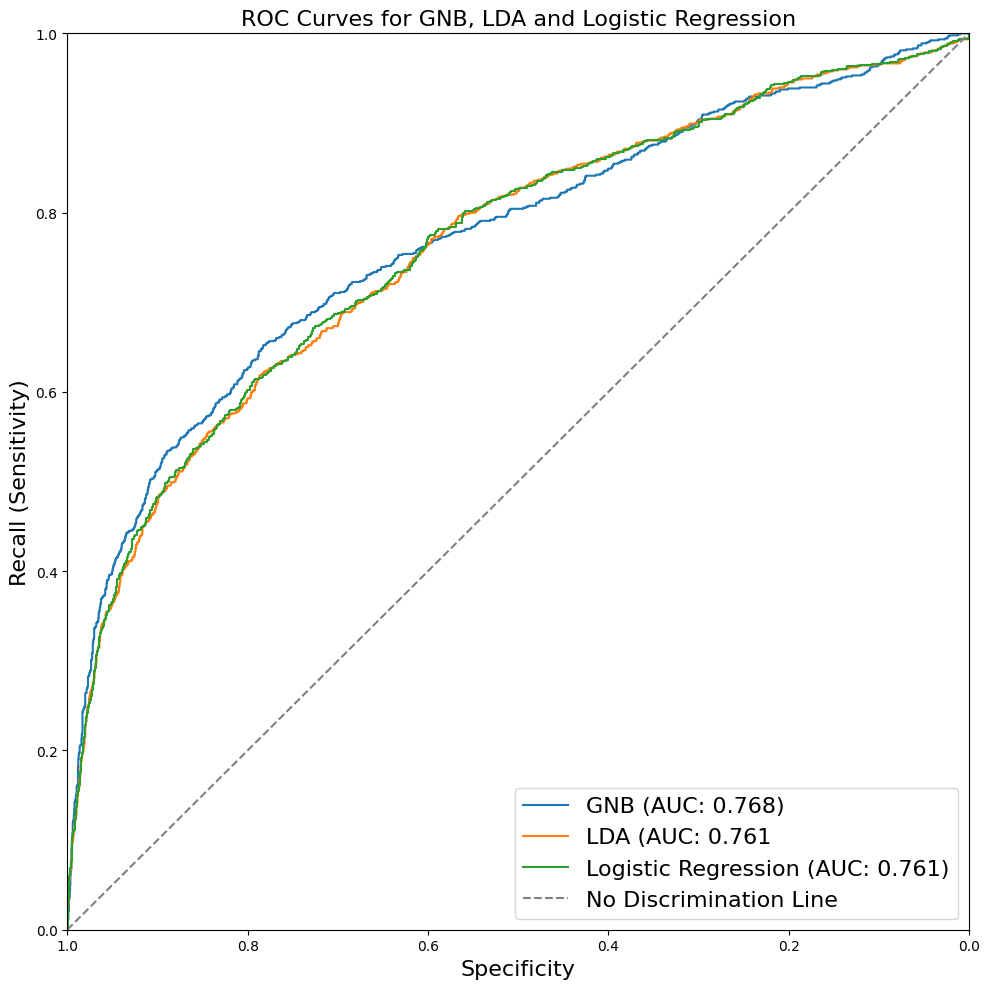

In [199]:
# Plotting the ROC curve
fig, ax = plt.subplots(figsize=(10, 10))
roc_curve_gnb.plot(x='Specificity', y='Recall', ax=ax, legend=False, label=f'GNB (AUC: {round(auc_score_gnb, 3)})')
roc_curve_lda.plot(x='Specificity', y='Recall', ax=ax, legend=False, label=f'LDA (AUC: {round(auc_score_lda, 3)}')
roc_curve_log.plot(x='Specificity', y='Recall', ax=ax, legend=False, label=f'Logistic Regression (AUC: {round(auc_score_lda, 3)})')
plt.legend(fontsize=16)
ax.plot([1, 0], [0, 1], linestyle='--', color='gray', label='No Discrimination Line')  # Diagonal line
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel('Specificity', fontsize=16)  # Set empty label (for better visualisation)
ax.set_ylabel('Recall (Sensitivity)', fontsize=16)
ax.set_title('ROC Curves for GNB, LDA and Logistic Regression', fontsize=16)

plt.tight_layout()
plt.savefig('../reports/figures/roc_curve.png')
plt.show()